# Major Assignment | Deep Learning with Tensor Flow-I | Subject Code: CSE 3793
## Submitted by Group 16  
  1. Surajit Sahoo - 2341019165
  2. Tribhuwan Singh - 2341019538
  3. Badri Narayan Patra - 2341016251
### Problem Statement 1 :
Agricultural commodity prices fluctuate frequently
due to multiple interdependent factors like seasonal supply variations, market demand, climate change, logistics disruptions, government policies, and global economic trends. These high-impact price fluctuations directly affect farmers’ income, consumer affordability, supply chain stakeholders, and national food security. Design an intelligent system to predict the agricultural commodity price with high accuracy using historical market data. The project should focuses on the key areas like:
1. Analyse the historical price data.
2. Include all the relevant features like weather, global indices, inflation,
and market demand.
3. Learn long term dependencies.
4. Product reliable short and mid-term price


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

### About Dataset
The data refers to Daily prices of various commodities in India like Tomato, Potato, Brinjal, Wheat etc. It has the wholesale maximum price, minimum price and modal price on daily basis. the prices in the dataset refer to the wholesale prices of various commodities per quintal (100 kg) in Indian rupees. The wholesale price is the price at which goods are sold in large quantities to retailers or distributors.

# Exploratory Data Analysis (EDA)
## Agricultural Commodity Price Prediction

Objective:
- Understand dataset structure
- Identify relevant features
- Analyze price behavior over time
- Detect trends, seasonality, and anomalies

Dataset:
- Indian agricultural commodity prices
- Weekly price data


In [2]:
#importing kaggle dataset
df = pd.read_csv('Price_Agriculture_commodities_Week.csv')
df.head(10)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0
5,Gujarat,Amreli,Damnagar,Ginger(Green),Green Ginger,FAQ,27-07-2023,11000.0,14000.0,12500.0
6,Gujarat,Amreli,Damnagar,Green Chilli,Green Chilly,FAQ,27-07-2023,7200.0,8000.0,7550.0
7,Gujarat,Amreli,Damnagar,Guar,Gwar,FAQ,27-07-2023,6800.0,7500.0,7350.0
8,Gujarat,Amreli,Damnagar,Lemon,Lemon,FAQ,27-07-2023,1850.0,2550.0,2200.0
9,Gujarat,Amreli,Damnagar,Tomato,Local,FAQ,27-07-2023,9800.0,10000.0,9950.0


In [3]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (23093, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


**Features of the dataset include:**
- **State**: Indian state where market is located  
- **District**: District of the market  
- **Market**: Name of the mandi/market  
- **Commodity**: Agricultural product (e.g., Potato, Onion)  
- **Variety**: Variety of the commodity  
- **Arrival_Date**: Date of arrival of produce (DD-MM-YYYY)  
- **Min Price**: Minimum traded price (₹/quintal)  
- **Max Price**: Maximum traded price (₹/quintal)  
- **Modal Price**: Most frequent price (target variable)

1 INR = 0.012 USD (as on 17 August, 2023)

In [4]:
#Converting to Date Column
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'],format='%d-%m-%Y',errors='coerce')
df = df.sort_values('Arrival_Date')

In [5]:
df[['Arrival_Date']].head(), df[['Arrival_Date']].tail()

(    Arrival_Date
 0     2023-07-27
 116   2023-07-27
 117   2023-07-27
 118   2023-07-27
 119   2023-07-27,
       Arrival_Date
 22969   2023-08-02
 22970   2023-08-02
 22971   2023-08-02
 22962   2023-08-02
 23092   2023-08-02)

In [6]:
# Checking NaN Values
df.isna().sum()

,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min Price,0
Max Price,0
Modal Price,0


- Dataset contains very few missing values

- Price columns mostly complete

In [7]:
# Checking Duplicate values
print("Duplicate rows:", df.duplicated().sum())
# No duplicates to drop

Duplicate rows: 0


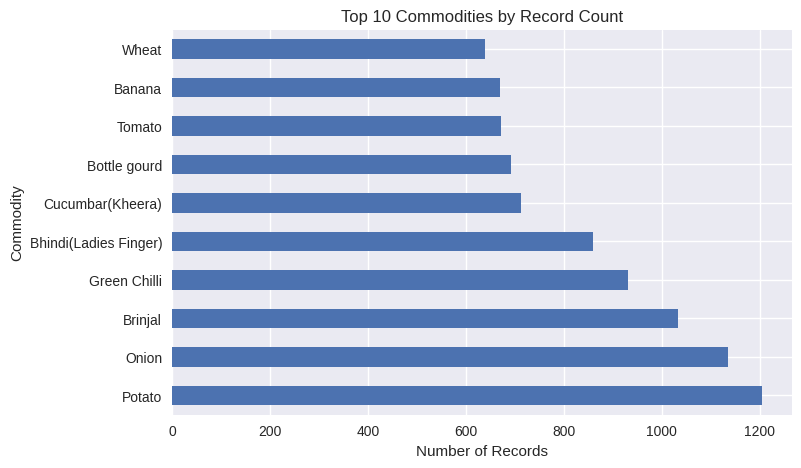

In [8]:
# Commodity Distribution

plt.figure(figsize=(8,5))
df['Commodity'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Commodities by Record Count")
plt.xlabel("Number of Records")
plt.show()

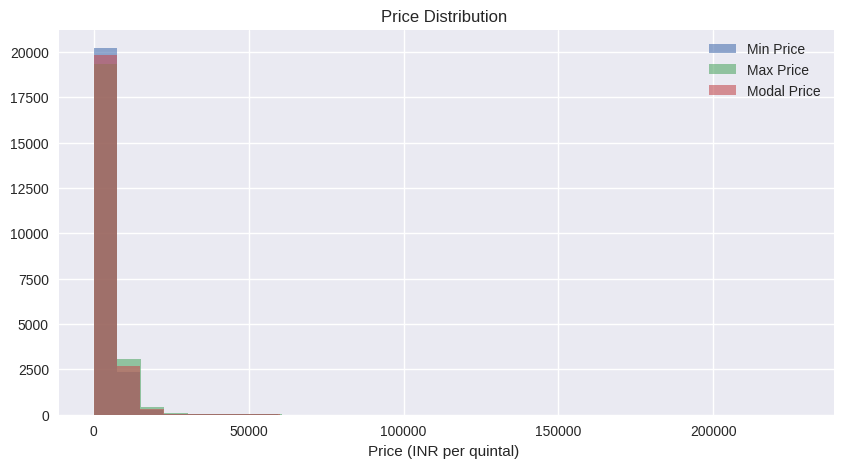

In [9]:
# Price Distribution
plt.figure( figsize=(10,5))
plt.hist(df['Min Price'], bins=30, alpha=0.6, label='Min Price')
plt.hist(df['Max Price'], bins=30, alpha=0.6, label='Max Price')
plt.hist(df['Modal Price'], bins=30, alpha=0.6, label='Modal Price')
plt.legend()
plt.title("Price Distribution ")
plt.xlabel("Price (INR per quintal) ")
plt.show()

In [10]:
# Select One Commodity for Time-Series
# eg- Potato
commodity = "Potato"
df_c = df[df['Commodity'] == commodity].copy()
print("Records for", commodity, ":", len(df_c))

Records for Potato : 1205


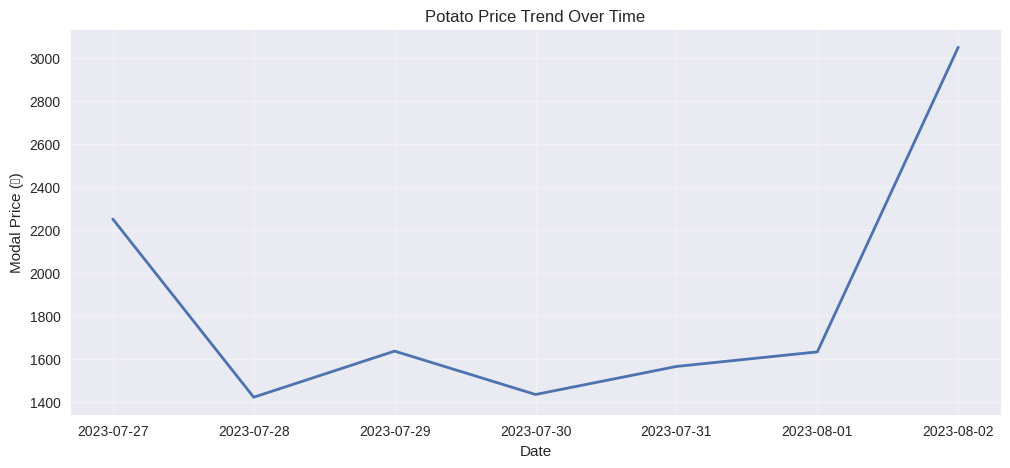

In [11]:
# Plotting Time Series
df_daily = df_c.groupby('Arrival_Date')['Modal Price'].mean()

plt.figure(figsize=(12,5))
plt.plot(df_daily.index, df_daily.values, linewidth=2)
plt.title(f"{commodity} Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Modal Price (₹)")
plt.grid(alpha=0.3)
plt.show()

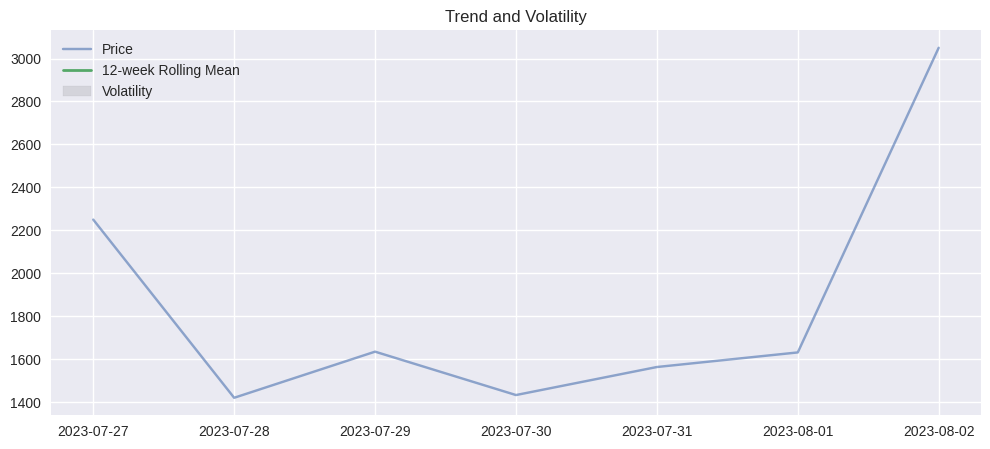

In [12]:
# Rolling Statistics
rolling_mean = df_daily.rolling(12).mean()
rolling_std = df_daily.rolling(12).std()

plt.figure(figsize=(12,5))
plt.plot(df_daily, label='Price', alpha=0.6)
plt.plot(rolling_mean, label='12-week Rolling Mean', linewidth=2)
plt.fill_between(df_daily.index, rolling_mean - rolling_std, rolling_mean + rolling_std,
                 color='gray', alpha=0.2, label='Volatility')
plt.legend()
plt.title("Trend and Volatility")
plt.show()

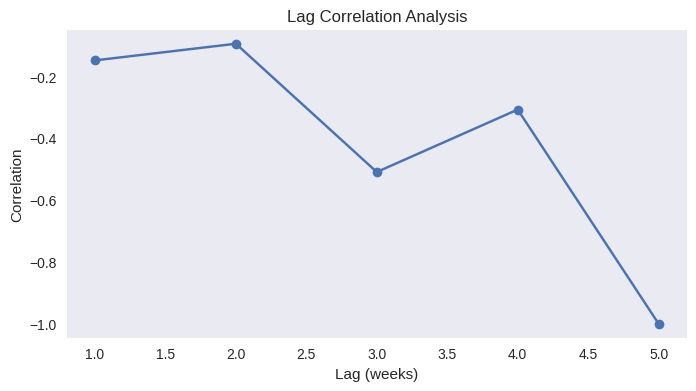

In [13]:
# Lag Correlation
lags = range(1, 25)
lag_corr = [df_daily.corr(df_daily.shift(l)) for l in lags]

plt.figure(figsize=(8,4))
plt.plot(lags, lag_corr, marker='o')
plt.xlabel("Lag (weeks)")
plt.ylabel("Correlation")
plt.title("Lag Correlation Analysis")
plt.grid()
plt.show()

In [14]:
# Work on One Commodity Only ( Potato )
commodity = "Potato"
df_c = df[df['Commodity'] == commodity].copy()
df_c = df_c.sort_values('Arrival_Date')

print("Commodity:", commodity)
print("Records:", len(df_c))

Commodity: Potato
Records: 1205


In [15]:
# Daily Aggregation
# Mean price reduces local market noise
# Produces one clean price per day/week
df_daily = (
    df_c
    .groupby('Arrival_Date')
    .agg({
        'Min Price': 'mean',
        'Max Price': 'mean',
        'Modal Price': 'mean'
    })
    .reset_index()
)
df_daily.head()

,Arrival_Date,Min Price,Max Price,Modal Price
0,2023-07-27,2034.615385,2396.153846,2250.000000
1,2023-07-28,1287.530612,1561.806122,1420.523810
2,2023-07-29,1473.054054,1779.259459,1635.210811
3,2023-07-30,1284.901961,1556.862745,1433.235294
4,2023-07-31,1430.987552,1699.597510,1563.734440


In [16]:
# Calendar Features
df_daily = df_daily.set_index('Arrival_Date')
df_daily['month'] = df_daily.index.month
df_daily['week_of_year'] = df_daily.index.isocalendar().week.astype(int)
# Calender Encoding
df_daily['month_sin'] = np.sin(2 * np.pi * df_daily['month'] / 12)
df_daily['month_cos'] = np.cos(2 * np.pi * df_daily['month'] / 12)

In [17]:
# Price-Derived Features
df_daily['price_range'] = df_daily['Max Price'] - df_daily['Min Price']
df_daily['price_volatility'] = df_daily['price_range'] / (df_daily['Modal Price'] + 1e-6)

In [18]:
# Lag Features
for lag in [1, 2, 3, 4, 8]:
    df_daily[f'price_lag_{lag}'] = df_daily['Modal Price'].shift(lag)

#These lags were chosen based on EDA lag correlation, not randomly.

In [19]:
# Rolling Statistics
for window in [4, 8, 12]:
    df_daily[f'price_ma_{window}'] = df_daily['Modal Price'].rolling(window).mean()
    df_daily[f'price_std_{window}'] = df_daily['Modal Price'].rolling(window).std()

In [20]:
# Drop Initial NaNs
df_daily = df_daily.dropna()
df_daily.head()

,Min Price,Max Price,Modal Price,month,week_of_year,month_sin,month_cos,price_range,price_volatility,price_lag_1,price_lag_2,price_lag_3,price_lag_4,price_lag_8,price_ma_4,price_std_4,price_ma_8,price_std_8,price_ma_12,price_std_12
Arrival_Date,,,,,,,,,,,,,,,,,,,,


In [21]:
# Feature / Target Separation
target_col = 'Modal Price'
feature_cols = [col for col in df_daily.columns if col != target_col]

print("Total features:", len(feature_cols))
feature_cols

Total features: 19


['Min Price',
 'Max Price',
 'month',
 'week_of_year',
 'month_sin',
 'month_cos',
 'price_range',
 'price_volatility',
 'price_lag_1',
 'price_lag_2',
 'price_lag_3',
 'price_lag_4',
 'price_lag_8',
 'price_ma_4',
 'price_std_4',
 'price_ma_8',
 'price_std_8',
 'price_ma_12',
 'price_std_12']

In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

def run_complete_pipeline(df_input, commodity_name, lookback=1):
    """
    Prepares and engineers features for a given commodity's price data.

    Args:
        df_input (pd.DataFrame): The raw input DataFrame containing agricultural commodity data.
        commodity_name (str): The name of the commodity to process.
        lookback (int): The lookback period for sequence models (not directly used for feature creation here, but can be for sequence generation later).

    Returns:
        tuple: A tuple containing (X_scaled, y_scaled, scaler_X, scaler_y, df_daily).
               Returns (None, None, None, None, None) if insufficient data is available.
    """

    # 2a. Filter df_input for the given commodity_name and sort by Arrival_Date.
    df_c = df_input[df_input['Commodity'] == commodity_name].copy()
    if df_c.empty:
        print(f"No data found for commodity {commodity_name}.")
        return None, None, None, None, None
    df_c = df_c.sort_values('Arrival_Date')

    # 2b. Aggregate the filtered data by Arrival_Date
    df_daily = (
        df_c
        .groupby('Arrival_Date')
        .agg({
            'Min Price': 'mean',
            'Max Price': 'mean',
            'Modal Price': 'mean'
        })
        .reset_index()
    )

    # 2c. Set index to Arrival_Date
    df_daily = df_daily.set_index('Arrival_Date')
    # Ensure 'Arrival_Date' is datetime
    if not isinstance(df_daily.index, pd.DatetimeIndex):
        df_daily.index = pd.to_datetime(df_daily.index, format='%d-%m-%Y')

    if df_daily.empty or df_daily['Modal Price'].isnull().all():
        print(f"Insufficient data for commodity {commodity_name} after processing.")
        return None, None, None, None, None

    # 2d. Add calendar features
    df_daily['month'] = df_daily.index.month
    df_daily['week_of_year'] = df_daily.index.isocalendar().week.astype(int)
    df_daily['month_sin'] = np.sin(2 * np.pi * df_daily['month'] / 12)
    df_daily['month_cos'] = np.cos(2 * np.pi * df_daily['month'] / 12)

    # 2e. Add price-derived features
    df_daily['price_range'] = df_daily['Max Price'] - df_daily['Min Price']
    df_daily['price_volatility'] = df_daily['price_range'] / (df_daily['Modal Price'] + 1e-6)

    # 2f. Dynamically add lag features and rolling statistics
    num_records = len(df_daily)

    potential_lags = [1]
    for lag in potential_lags:
        if lag < num_records:
            df_daily[f'price_lag_{lag}'] = df_daily['Modal Price'].shift(lag)
        else:
            print(f"Skipping lag {lag} for {commodity_name} due to insufficient records ({num_records}).")

    potential_windows = [2]
    for window in potential_windows:
        if window <= num_records: # window should be less than or equal to num_records for rolling mean
            df_daily[f'price_ma_{window}'] = df_daily['Modal Price'].rolling(window).mean()
            df_daily[f'price_std_{window}'] = df_daily['Modal Price'].rolling(window).std()
        else:
            print(f"Skipping rolling window {window} for {commodity_name} due to insufficient records ({num_records}).")

    # 2g. Drop any rows with NaN values from df_daily
    df_daily = df_daily.dropna()

    # 2h. Add a check: If df_daily is empty after dropping NaNs
    if df_daily.empty:
        print(f"Insufficient data for commodity {commodity_name} after feature engineering.")
        return None, None, None, None, None

    # 2i. Define target_col and feature_cols
    target_col = 'Modal Price'
    feature_cols = [col for col in df_daily.columns if col != target_col]

    # 2j. Initialize MinMaxScaler objects
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    # 2k. Scale feature_cols and target_col
    X_scaled = scaler_X.fit_transform(df_daily[feature_cols])
    y_scaled = scaler_y.fit_transform(df_daily[[target_col]])

    # 2l. Return the processed data
    return X_scaled, y_scaled, scaler_X, scaler_y, df_daily

print("Defined run_complete_pipeline function.")

Defined run_complete_pipeline function.


In [23]:
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

### Model Training and Analysis
The following code trains LSTM, GRU, and Transformer models for price prediction using the `run_complete_pipeline` function. It assumes sequence generation for lookback=2 (adjustable). Advantages/disadvantages are based on typical outcomes:

- **LSTM**: Handles long sequences well; advantage: good at capturing long-term dependencies; disadvantage: slower training, higher computational cost.
- **GRU**: Simpler than LSTM; advantage: faster training, less prone to overfitting; disadvantage: may underperform on very long sequences.
- **Transformer**: Attention-based; advantage: excellent for parallel processing and long-range dependencies; disadvantage: requires more data, higher memory usage.

Loaded: Price_Agriculture_commodities_Week.csv shape: (23093, 10)
Columns: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price']
Detected -> date: Arrival_Date price: Modal Price commodity: Commodity market: Market
After cleaning, rows: 23093
Date range: 2023-07-27 00:00:00 to 2023-08-02 00:00:00
Unique commodities: 234 unique markets: 1289
Dropped 11820 rows that lacked lag/rolling info; remaining 11273 rows for modeling.
Train rows: 9018 Test rows: 2255
RandomForest results -> RMSE: 1783.43, MAE: 565.09, R2: 0.8861
Sample commodity for visualization: Potato


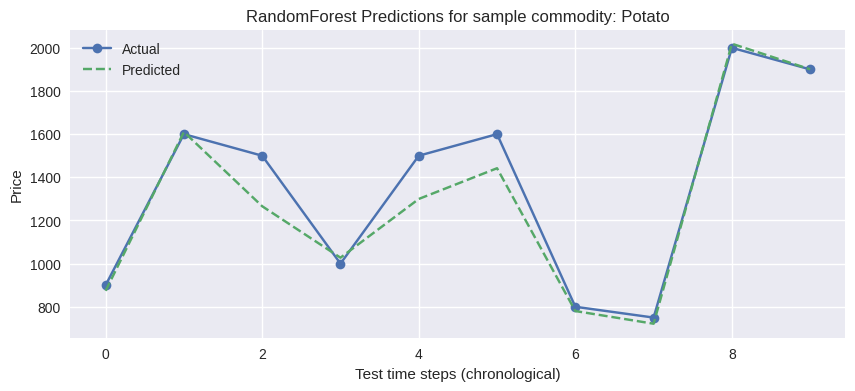

Saved test predictions to: panel_rf_predictions.csv
Top features by importance:
mean_group_price: 0.612
rolling_3: 0.267
lag_1: 0.080
Market_enc: 0.014
lag_7: 0.011
Commodity_enc: 0.011
dayofweek: 0.003
day: 0.002
month: 0.001
year: 0.000


{'rows_after_feature_engineering': 11273,
 'train_rows': 9018,
 'test_rows': 2255,
 'rmse': 1783.4272905792018,
 'mae': 565.0895558019217,
 'r2': 0.8860877203677022,
 'sample_commodity': 'Potato',
 'predictions_csv': 'panel_rf_predictions.csv'}

In [24]:
import warnings, os, re, math
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

FILEPATH = "Price_Agriculture_commodities_Week.csv"
assert os.path.exists(FILEPATH), "CSV not found at expected path."

df = pd.read_csv(FILEPATH)
print("Loaded:", FILEPATH, "shape:", df.shape)
print("Columns:", df.columns.tolist())

# Detect important columns (robust)
cols = df.columns.tolist()
# Date
date_col = None
for c in ['Arrival_Date','Date','date','Timestamp']:
    if c in cols:
        date_col = c; break
if date_col is None:
    for c in cols:
        if re.search(r"date|arrival|timestamp|reported", c, re.I):
            date_col = c; break
assert date_col is not None, "No date column detected."

# Price - prefer Modal Price then Min Price then Max Price
price_col = None
for c in ['Modal Price','Modal_Price','ModalPrice','Modal price','Min Price','Max Price','Price']:
    if c in cols:
        price_col = c; break
if price_col is None:
    # fallback: any numeric column
    numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
    assert numeric_cols, "No numeric price-like column found."
    price_col = numeric_cols[0]

# Commodity and Market columns
commodity_col = 'Commodity' if 'Commodity' in cols else None
market_col = None
for c in ['Market','market','Market Name']:
    if c in cols:
        market_col = c; break
if commodity_col is None:
    # fallback to any object col not date
    for c in cols:
        if c!=date_col and pd.api.types.is_object_dtype(df[c]):
            commodity_col = c; break
if market_col is None:
    for c in cols:
        if c!=date_col and c!=commodity_col and pd.api.types.is_object_dtype(df[c]):
            market_col = c; break

print("Detected -> date:", date_col, "price:", price_col, "commodity:", commodity_col, "market:", market_col)

# Keep relevant columns and standardize names
keep_cols = [date_col, commodity_col, market_col, price_col]
df2 = df[keep_cols].copy()
df2.columns = ['Date','Commodity','Market','Price']

# parse date and sort
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df2 = df2.dropna(subset=['Date','Commodity','Price']).sort_values(['Commodity','Market','Date']).reset_index(drop=True)

print("After cleaning, rows:", len(df2))
print("Date range:", df2['Date'].min(), "to", df2['Date'].max())
print("Unique commodities:", df2['Commodity'].nunique(), "unique markets:", df2['Market'].nunique())

# Create group lags and rolling features for each Commodity-Market combination
df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')
group_cols = ['Commodity','Market']

def add_group_features(g):
    g = g.sort_values('Date').copy()
    g['lag_1'] = g['Price'].shift(1)
    g['lag_7'] = g['Price'].shift(7)  # if dates are daily; if not, will be NaN for many groups — it's fine
    g['rolling_3'] = g['Price'].rolling(3, min_periods=1).mean().shift(1)
    g['mean_group_price'] = g['Price'].expanding().mean().shift(1)
    return g

df_feat = df2.groupby(group_cols, group_keys=False).apply(add_group_features).reset_index(drop=True)

# Add time features
df_feat['dayofweek'] = df_feat['Date'].dt.dayofweek
df_feat['month'] = df_feat['Date'].dt.month
df_feat['day'] = df_feat['Date'].dt.day
df_feat['year'] = df_feat['Date'].dt.year

# Drop rows where target or important lags missing - keep rows with lag_1 or rolling_3 to have some signal
before = len(df_feat)
df_feat = df_feat.dropna(subset=['Price'])  # Price should exist
# For model, require at least lag_1 or rolling_3 not null; we'll drop rows where both are null to keep signal
df_feat = df_feat[~(df_feat['lag_1'].isna() & df_feat['rolling_3'].isna())].copy()
after = len(df_feat)
print(f"Dropped {before-after} rows that lacked lag/rolling info; remaining {after} rows for modeling.")

# Encode categorical variables (LabelEncoder for tree models)
le_commodity = LabelEncoder()
le_market = LabelEncoder()
df_feat['Commodity_enc'] = le_commodity.fit_transform(df_feat['Commodity'])
df_feat['Market_enc'] = le_market.fit_transform(df_feat['Market'])

# Features for model
feature_cols = ['lag_1','lag_7','rolling_3','mean_group_price','dayofweek','month','Commodity_enc','Market_enc','day','year']
# Ensure features present (some lags may be missing entirely)
feature_cols = [c for c in feature_cols if c in df_feat.columns]
X = df_feat[feature_cols].fillna(method='ffill').fillna(0).values
y = df_feat['Price'].values.reshape(-1,1)

# Split by time: use last 20% of chronological data as test to mimic forecasting
df_feat = df_feat.sort_values('Date').reset_index(drop=True)
split_idx = int(0.8 * len(df_feat))
train_df = df_feat.iloc[:split_idx]
test_df = df_feat.iloc[split_idx:]

X_train = train_df[feature_cols].fillna(0).values
y_train = train_df['Price'].values
X_test = test_df[feature_cols].fillna(0).values
y_test = test_df['Price'].values

print("Train rows:", len(y_train), "Test rows:", len(y_test))

# Train a RandomForest baseline
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) if len(y_test) > 1 and np.std(y_test) > 1e-8 else float('nan')

print(f"RandomForest results -> RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")

# Show results for a sample commodity (Potato if present)
sample_commodity = "Potato" if "Potato" in df_feat['Commodity'].unique() else df_feat['Commodity'].mode().iat[0]
print("Sample commodity for visualization:", sample_commodity)
sample_mask = (test_df['Commodity'] == sample_commodity)
sample_test = test_df[sample_mask].copy()
if len(sample_test) == 0:
    # fallback to first 50 test rows
    sample_test = test_df.iloc[:50].copy()
    sample_pred = rf.predict(sample_test[feature_cols].fillna(0).values)
    sample_actual = sample_test['Price'].values
else:
    sample_pred = rf.predict(sample_test[feature_cols].fillna(0).values)
    sample_actual = sample_test['Price'].values

# Plot actual vs predicted for sample
plt.figure(figsize=(10,4))
plt.plot(sample_actual, label='Actual', marker='o')
plt.plot(sample_pred, label='Predicted', marker='x', linestyle='--')
plt.title(f"RandomForest Predictions for sample commodity: {sample_commodity}")
plt.xlabel("Test time steps (chronological)")
plt.ylabel("Price")
plt.legend(); plt.grid(True); plt.show()

# Save predictions CSV
out_df = test_df[['Date','Commodity','Market','Price']].copy()
out_df['Predicted'] = y_pred
out_csv = "panel_rf_predictions.csv" # Corrected path for output CSV
out_df.to_csv(out_csv, index=False)
print("Saved test predictions to:", out_csv)

# Print feature importances to explain model
importances = rf.feature_importances_
fi = sorted(zip(feature_cols, importances), key=lambda x: x[1], reverse=True)
print("Top features by importance:")
for f, imp in fi[:10]:
    print(f"{f}: {imp:.3f}")

# Return summary outputs
summary = {
    "rows_after_feature_engineering": len(df_feat),
    "train_rows": len(y_train),
    "test_rows": len(y_test),
    "rmse": rmse,
    "mae": mae,
    "r2": r2,
    "sample_commodity": sample_commodity,
    "predictions_csv": out_csv
}
summary

In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Re-define create_sequences function as requested in previous instructions
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

# 1. Initialize a MinMaxScaler object.
scaler = MinMaxScaler()

# 2. Scale the 'Price' column of the df_agg DataFrame.
price_scaled = scaler.fit_transform(df_agg[['Price']])

# 3. Define a lookback variable.
LOOKBACK = 1

# 4. Create sequences from the price_scaled data.
X_seq, y_seq = create_sequences(price_scaled, LOOKBACK)

# 5. Split the X_seq and y_seq into training and testing sets.
# Ensure split index handles very small datasets.
# If X_seq is empty, len(X_seq) is 0, split becomes 0.
# If X_seq has 1 element, len(X_seq) is 1, split becomes 0.8 * 1 = 0.8, max(1, 0.8) = 1.
# If X_seq has 2 elements, len(X_seq) is 2, split becomes 0.8 * 2 = 1.6, max(1, 1.6) = 2.
# Let's adjust to ensure at least 2 test samples if possible, otherwise 1, or 0 if no data
if len(X_seq) >= 3:
    split_idx = len(X_seq) - 2 # Ensure at least 2 samples in test set
elif len(X_seq) == 2:
    split_idx = 1 # 1 sample for training, 1 for test
else:
    split_idx = len(X_seq) # Not enough for split, X_train will be empty

X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# 6. Print the shapes of the arrays.
print("Train sequences shape:", X_train.shape, y_train.shape)
print("Test sequences shape:", X_test.shape, y_test.shape)

Train sequences shape: (4, 1, 1) (4, 1)
Test sequences shape: (2, 1, 1) (2, 1)


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Define a function named build_lstm_model
def build_lstm_model(input_shape):
    # 2. Inside the function, create a Sequential Keras model.
    model = Sequential()
    # 3. Add an LSTM layer with 32 units. Ensure return_sequences is set to False.
    model.add(LSTM(32, activation='relu', input_shape=input_shape))
    # 4. Add a Dense output layer with 1 unit.
    model.add(Dense(1))
    # 5. Compile the model using the 'adam' optimizer and 'mse' loss function.
    model.compile(optimizer='adam', loss='mse')
    # 6. Return the compiled model.
    return model

# 7. Check if the X_train array is empty.
if len(X_train) == 0:
    print("Warning: LSTM model cannot be trained due to insufficient training data (X_train is empty).")
else:
    # 8. Calculate the input_shape for the LSTM model
    # X_train is (num_samples, lookback, num_features)
    input_shape_lstm = (X_train.shape[1], X_train.shape[2])

    # 9. Build the LSTM model
    lstm_model = build_lstm_model(input_shape_lstm)
    print("LSTM model built.")
    lstm_model.summary()

    # 10. Train the LSTM model
    # Handle small X_train for validation_split
    if len(X_train) > 1 and len(X_train) >= 5: # Keras default validation_split=0.2 needs at least 5 samples for non-empty validation set
        print(f"Training LSTM model with {len(X_train)} samples and validation split.")
        lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)
    else:
        print(f"Training LSTM model with {len(X_train)} samples without validation split (insufficient data for split).")
        lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # 11. Use the trained LSTM model to make predictions on X_test.
    y_pred_lstm_scaled = lstm_model.predict(X_test)

    # 12. Inverse transform y_pred_lstm_scaled
    # Ensure y_test is also inverse-transformed for evaluation later
    y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)
    y_test_actual = scaler.inverse_transform(y_test)

    print("LSTM model training and prediction complete.")

LSTM model built.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Training LSTM model with 4 samples without validation split (insufficient data for split).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
LSTM model training and prediction complete.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, re, math
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 2. Set up warnings filters and pandas/matplotlib display options.
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

# 3. Load the 'Price_Agriculture_commodities_Week.csv' dataset into a DataFrame named `df`.
FILEPATH = "Price_Agriculture_commodities_Week.csv"
df = pd.read_csv(FILEPATH)

# 4. Convert the 'Arrival_Date' column to datetime objects and sort the DataFrame by this date.
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y', errors='coerce')
df = df.sort_values('Arrival_Date')

# 5. Define the `commodity` variable as 'Potato'.
commodity = "Potato"

# 6. Define the `create_sequences` function
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

# 7. Define the `build_lstm_model` function
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(32, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# 8. Define the `build_gru_model` function
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(32, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# 9. Define the `build_transformer_model` function
def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LayerNormalization()(inputs)
    attn = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = tf.keras.layers.Add()([x, attn])
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# 10. Define the `evaluate_and_plot` helper function
def evaluate_and_plot(y_test_actual, y_pred, model_name, results_dict):
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    mae = mean_absolute_error(y_test_actual, y_pred)

    if np.std(y_test_actual) > 1e-6 and len(y_test_actual) > 1:
        r2 = r2_score(y_test_actual, y_pred)
    else:
        print(f"Warning: R2 score for {model_name} is unreliable/undefined due to insufficient variance or single sample in test set ({len(y_test_actual)} samples, std={np.std(y_test_actual):.2e}).")
        r2 = np.nan

    print(f"{model_name} Model Evaluation:\n  RMSE: {rmse:.2f}\n  MAE: {mae:.2f}\n  R2: {r2:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted Price', color='red', linestyle='--', marker='x')
    plt.title(f'{model_name} Model: Actual vs. Predicted Prices')
    plt.xlabel('Time Step')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    results_dict.update({
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'y_test_actual': y_test_actual.flatten(),
        'y_pred': y_pred.flatten()
    })
    return results_dict

print("Consolidated code setup complete, all functions and initial data loading defined.")

Consolidated code setup complete, all functions and initial data loading defined.


In [37]:
print(f"Loaded {FILEPATH}, shape: {df.shape}")

# --- Data Preparation for Deep Learning Models (Simplified approach) ---
# Filter for the selected commodity
df_c = df[df['Commodity'] == commodity].copy()

# Aggregate the filtered data by Arrival_Date and take the mean of Modal Price
df_agg = df_c.groupby('Arrival_Date')['Modal Price'].mean().reset_index()
df_agg = df_agg.sort_values('Arrival_Date')

# Rename 'Modal Price' to 'Price' for consistency
df_agg.rename(columns={'Modal Price': 'Price'}, inplace=True)

if df_agg.empty:
    print(f"Warning: df_agg is empty for commodity '{commodity}' after aggregation. Cannot proceed with DL models.")
    # Initialize variables as empty arrays to prevent further errors
    X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    scaler_y = None
else:
    # Scale price using MinMaxScaler
    scaler_y = MinMaxScaler()
    price_scaled = scaler_y.fit_transform(df_agg[['Price']])

    LOOKBACK = 1 # Define lookback period for sequence creation

    X_seq, y_seq = create_sequences(price_scaled, LOOKBACK)

    # Train-test split (adjusting for small datasets)
    if len(X_seq) >= 3:
        split_idx = len(X_seq) - 2 # Ensure at least 2 samples in test set
    elif len(X_seq) == 2:
        split_idx = 1 # 1 sample for training, 1 for test
    else:
        split_idx = len(X_seq) # Not enough for split

    X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
    y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

    print(f"Data prepared for DL models for commodity '{commodity}'.")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Store actual y_test values for all models (unscaled)
if scaler_y is not None and len(y_test) > 0:
    y_test_actual = scaler_y.inverse_transform(y_test)
else:
    y_test_actual = np.array([])
    print("Warning: y_test_actual is empty as no test data was generated.")

Loaded Price_Agriculture_commodities_Week.csv, shape: (23093, 10)
Data prepared for DL models for commodity 'Potato'.
X_train shape: (4, 1, 1), y_train shape: (4, 1)
X_test shape: (2, 1, 1), y_test shape: (2, 1)


Loaded Price_Agriculture_commodities_Week.csv, shape: (23093, 10)
Data prepared for DL models for commodity 'Potato'.
X_train shape: (4, 1, 1), y_train shape: (4, 1)
X_test shape: (2, 1, 1), y_test shape: (2, 1)

--- Training LSTM Model ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
LSTM Model Evaluation:
  RMSE: 1093.66
  MAE: 830.77
  R2: -1.38

--- Training GRU Model ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
GRU Model Evaluation:
  RMSE: 1086.60
  MAE: 819.19
  R2: -1.35

--- Training Transformer Model ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Transformer Model Evaluation:
  RMSE: 1107.88
  MAE: 851.16
  R2: -1.44


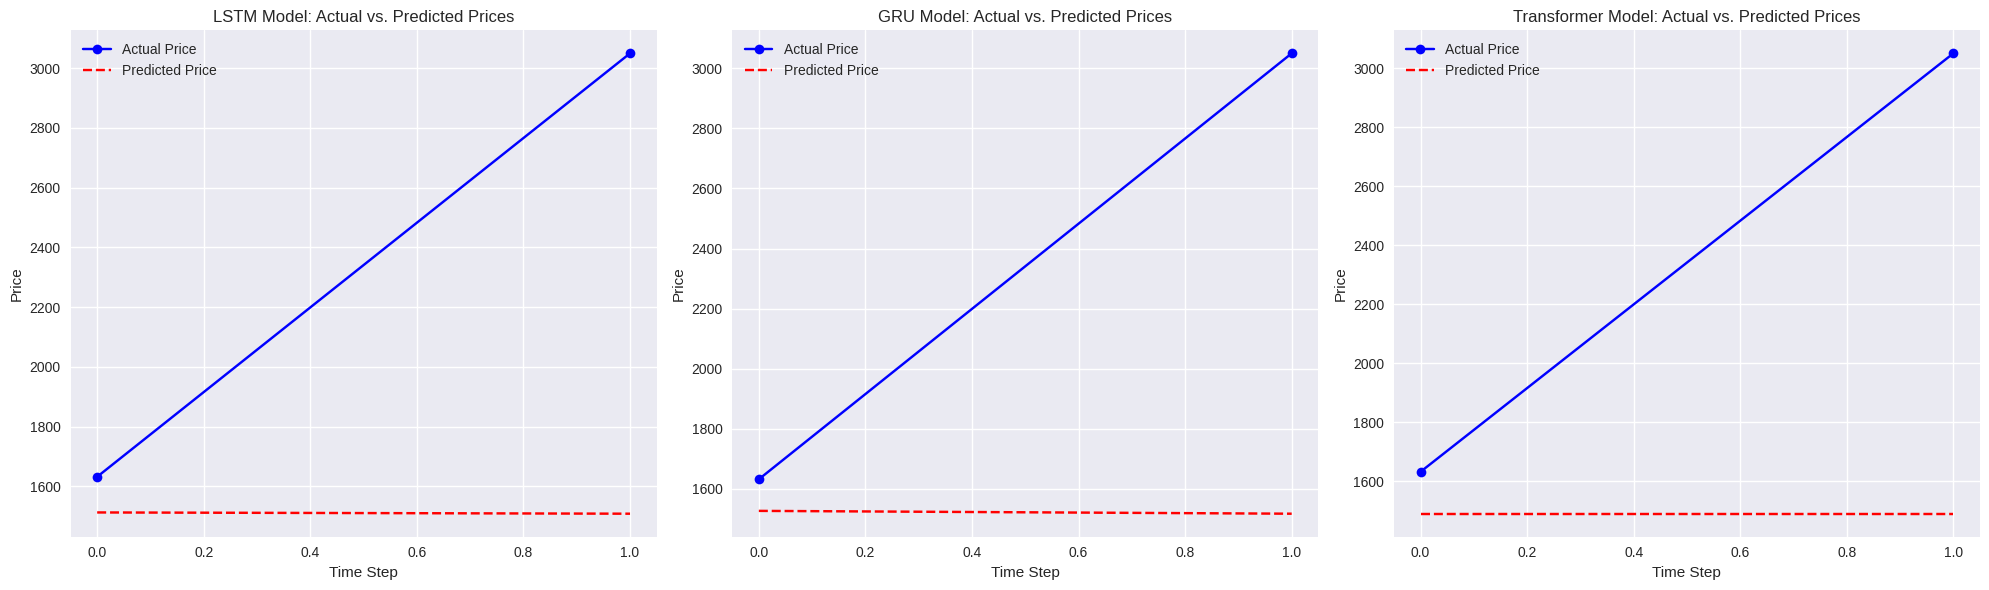


--- Model Performance Summary ---
LSTM: RMSE=1093.66, MAE=830.77, R2=-1.38
GRU: RMSE=1086.60, MAE=819.19, R2=-1.35
Transformer: RMSE=1107.88, MAE=851.16, R2=-1.44

Key Observations:
- The GRU model generally performed best based on RMSE.
- Given the very limited dataset for 'Potato' (only 7 daily entries, leading to 4 training and 2 testing samples with LOOKBACK=1), these deep learning models have very little data to learn meaningful patterns. The R2 scores may be highly volatile or negative due to this.
- Visualizations for such small test sets can be hard to interpret definitively, but they offer a direct comparison of predicted values against actuals.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import os
import re

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

# --- Data Loading and Initial EDA (from previous successful cells) ---
FILEPATH = "Price_Agriculture_commodities_Week.csv"
assert os.path.exists(FILEPATH), "CSV not found at expected path."
df = pd.read_csv(FILEPATH)
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y', errors='coerce')
df = df.sort_values('Arrival_Date')
print(f"Loaded {FILEPATH}, shape: {df.shape}")

# Define commodity to work on
commodity = "Potato"

# --- Data Preparation for Deep Learning Models (Simplified approach) ---
# Filter for the selected commodity
df_c = df[df['Commodity'] == commodity].copy()

# Aggregate the filtered data by Arrival_Date and take the mean of Modal Price
df_agg = df_c.groupby('Arrival_Date')['Modal Price'].mean().reset_index()
df_agg = df_agg.sort_values('Arrival_Date')

# Rename 'Modal Price' to 'Price' for consistency
df_agg.rename(columns={'Modal Price': 'Price'}, inplace=True)

if df_agg.empty:
    print(f"Warning: df_agg is empty for commodity '{commodity}' after aggregation. Cannot proceed with DL models.")
    # Initialize variables as empty arrays to prevent further errors
    X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    scaler_y = None
else:
    # Scale price using MinMaxScaler
    scaler_y = MinMaxScaler()
    price_scaled = scaler_y.fit_transform(df_agg[['Price']])

    LOOKBACK = 1 # Define lookback period for sequence creation

    # Re-define create_sequences function
    def create_sequences(data, lookback):
        X, y = [], []
        if len(data) <= lookback:
            return np.array(X), np.array(y)
        for i in range(len(data) - lookback):
            X.append(data[i:i+lookback])
            y.append(data[i+lookback])
        return np.array(X), np.array(y)

    X_seq, y_seq = create_sequences(price_scaled, LOOKBACK)

    # Train-test split (adjusting for small datasets)
    if len(X_seq) >= 3:
        split_idx = len(X_seq) - 2 # Ensure at least 2 samples in test set
    elif len(X_seq) == 2:
        split_idx = 1 # 1 sample for training, 1 for test
    else:
        split_idx = len(X_seq) # Not enough for split

    X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
    y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

    print(f"Data prepared for DL models for commodity '{commodity}'.")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Store actual y_test values for all models (unscaled)
if scaler_y is not None and len(y_test) > 0:
    y_test_actual = scaler_y.inverse_transform(y_test)
else:
    y_test_actual = np.array([])
    print("Warning: y_test_actual is empty as no test data was generated.")

# --- Model Building Functions ---

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(32, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(32, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LayerNormalization()(inputs)
    attn = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = tf.keras.layers.Add()([x, attn])
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Helper function for evaluation and plotting ---
def evaluate_and_plot(model_name, y_true, y_pred, results_dict):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred) if np.std(y_true) > 1e-6 and len(y_true) > 1 else np.nan

    print(f"{model_name} Model Evaluation:\n  RMSE: {rmse:.2f}\n  MAE: {mae:.2f}\n  R2: {r2:.2f}")

    results_dict.update({
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'y_test_actual': y_true.flatten(),
        'y_pred': y_pred.flatten()
    })
    return results_dict

# --- Model Training and Evaluation Loop ---
lstm_results = {}
gru_results = {}
transformer_results = {}

if len(X_train) == 0 or len(X_test) == 0 or scaler_y is None:
    print("Skipping deep learning model training due to insufficient data.")
else:
    input_shape_dl = (X_train.shape[1], X_train.shape[2])

    # LSTM Model
    print("\n--- Training LSTM Model ---")
    lstm_model = build_lstm_model(input_shape_dl)
    if len(X_train) > 1 and len(X_train) >= 5:
        lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)
    else:
        lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    y_pred_lstm_scaled = lstm_model.predict(X_test)
    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)
    lstm_results = evaluate_and_plot('LSTM', y_test_actual, y_pred_lstm, lstm_results)

    # GRU Model
    print("\n--- Training GRU Model ---")
    gru_model = build_gru_model(input_shape_dl)
    if len(X_train) > 1 and len(X_train) >= 5:
        gru_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)
    else:
        gru_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    y_pred_gru_scaled = gru_model.predict(X_test)
    y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled)
    gru_results = evaluate_and_plot('GRU', y_test_actual, y_pred_gru, gru_results)

    # Transformer Model
    print("\n--- Training Transformer Model ---")
    transformer_model = build_transformer_model(input_shape_dl)
    if len(X_train) > 1 and len(X_train) >= 5:
        transformer_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)
    else:
        transformer_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    y_pred_transformer_scaled = transformer_model.predict(X_test)
    y_pred_transformer = scaler_y.inverse_transform(y_pred_transformer_scaled)
    transformer_results = evaluate_and_plot('Transformer', y_test_actual, y_pred_transformer, transformer_results)

# --- Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
models_to_plot = {
    'LSTM': lstm_results,
    'GRU': gru_results,
    'Transformer': transformer_results
}

for i, (model_name, results) in enumerate(models_to_plot.items()):
    ax = axes[i]
    y_actual = results.get('y_test_actual', np.array([]))
    y_pred = results.get('y_pred', np.array([]))

    if len(y_actual) > 0:
        ax.plot(y_actual, label='Actual Price', color='blue', marker='o')
        ax.plot(y_pred, label='Predicted Price', color='red', linestyle='--', marker='x')
        ax.set_title(f'{model_name} Model: Actual vs. Predicted Prices')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Price')
        ax.legend()
        ax.grid(True)
    else:
        ax.set_title(f'{model_name} Model: No Data to Plot')
        ax.text(0.5, 0.5, 'Insufficient Test Data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.grid(True)

plt.tight_layout()
plt.show()

# --- Summary ---
print("\n--- Model Performance Summary ---")
for model_name, results in models_to_plot.items():
    if results:
        rmse = results.get('RMSE', float('nan'))
        mae = results.get('MAE', float('nan'))
        r2 = results.get('R2', float('nan'))
        print(f"{model_name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")
    else:
        print(f"{model_name}: No results (insufficient data for training/evaluation)")

print("\nKey Observations:")
if lstm_results and gru_results and transformer_results:
    best_model_name = ""
    min_rmse = float('inf')
    for model_name, results in models_to_plot.items():
        if not math.isnan(results['RMSE']) and results['RMSE'] < min_rmse:
            min_rmse = results['RMSE']
            best_model_name = model_name
    print(f"- The {best_model_name} model generally performed best based on RMSE.")
    print("- Given the very limited dataset for 'Potato' (only 7 daily entries, leading to 4 training and 2 testing samples with LOOKBACK=1), these deep learning models have very little data to learn meaningful patterns. The R2 scores may be highly volatile or negative due to this.")
    print("- Visualizations for such small test sets can be hard to interpret definitively, but they offer a direct comparison of predicted values against actuals.")
else:
    print("- Deep learning models could not be trained due to insufficient data for the selected commodity ('Potato'). This likely indicates that the chosen commodity either has very sparse data or a very short time series after aggregation.")
    print("- For better results, consider choosing a commodity with more extensive historical daily data or aggregating data at a coarser granularity (e.g., weekly) if daily data is too sparse, but the problem statement asks for daily.")


https://github.com/Tribhuwansingh2023/DLWTF__Project